# Data Preprocessing

## 1. Importing necessary libraries

- Importing the necessary libraries to deal with the data. We are going to need **NumPy**, **Pandas** and **Pathlib** to import the data. To plot the data, we are goint to use **Matplotlib** and **Seaborn**.

In [1]:
# Libraries to deal with the data
import numpy as np
import pandas as pd
import os
import pathlib


# Libraries to plot data
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

## 2. Importing raw dataset

- The dataset selected is the **"Back Order Prediction Using ANN"**, which has **23 columns** (features) and **1.048.575 rows** (observations).

In [2]:
# File parameters

file_name = 'Training_Dataset_v2.csv'
path = str(pathlib.Path().absolute())
path_dataset = path + '\\Datasets\\'
path_figures = path + '\\Figures\\'
path_result = path + '\\Result\\'


In [3]:
# Importing the dataset into a pandas dataframe
raw_csv_data = pd.read_csv(path_dataset + file_name, sep=',', error_bad_lines=True)

## 3. Inconsistency Check

The dataset has 23 columns where:
- 7 columns are **string** type.
- 13 columns are **integer** type.
- 3 columns are **float** type.

In [4]:
raw_csv_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 23 columns):
 #   Column             Non-Null Count    Dtype  
---  ------             --------------    -----  
 0   sku                1048575 non-null  int64  
 1   national_inv       1048575 non-null  int64  
 2   lead_time          984057 non-null   float64
 3   in_transit_qty     1048575 non-null  int64  
 4   forecast_3_month   1048575 non-null  int64  
 5   forecast_6_month   1048575 non-null  int64  
 6   forecast_9_month   1048575 non-null  int64  
 7   sales_1_month      1048575 non-null  int64  
 8   sales_3_month      1048575 non-null  int64  
 9   sales_6_month      1048575 non-null  int64  
 10  sales_9_month      1048575 non-null  int64  
 11  min_bank           1048575 non-null  int64  
 12  potential_issue    1048575 non-null  object 
 13  pieces_past_due    1048575 non-null  int64  
 14  perf_6_month_avg   1048575 non-null  float64
 15  perf_12_month_avg  1048575 non-n

In [5]:
raw_csv_data.shape

(1048575, 23)

- Checking for null values. The column **"lead_time"** has **64.518** missing values.

In [6]:
raw_csv_data.isnull().sum()

sku                      0
national_inv             0
lead_time            64518
in_transit_qty           0
forecast_3_month         0
forecast_6_month         0
forecast_9_month         0
sales_1_month            0
sales_3_month            0
sales_6_month            0
sales_9_month            0
min_bank                 0
potential_issue          0
pieces_past_due          0
perf_6_month_avg         0
perf_12_month_avg        0
local_bo_qty             0
deck_risk                0
oe_constraint            0
ppap_risk                0
stop_auto_buy            0
rev_stop                 0
went_on_backorder        0
dtype: int64

- Checking the rows which contain missing values.

In [7]:
raw_csv_data[raw_csv_data.isnull().any(axis=1)]

,sku,national_inv,lead_time,in_transit_qty,forecast_3_month,forecast_6_month,forecast_9_month,sales_1_month,sales_3_month,sales_6_month,...,pieces_past_due,perf_6_month_avg,perf_12_month_avg,local_bo_qty,deck_risk,oe_constraint,ppap_risk,stop_auto_buy,rev_stop,went_on_backorder
0,1026827,0,NaN,0,0,0,0,0,0,0,...,0,-99.0,-99.0,0,No,No,No,Yes,No,No
2,1043696,2,NaN,0,0,0,0,0,0,0,...,0,-99.0,-99.0,0,Yes,No,No,Yes,No,No
4,1044048,8,NaN,0,0,0,0,0,0,0,...,0,-99.0,-99.0,0,Yes,No,No,Yes,No,No
6,1044643,1095,NaN,0,0,0,0,0,0,0,...,0,-99.0,-99.0,0,Yes,No,No,Yes,No,No
8,1045815,140,NaN,0,15,114,152,0,0,0,...,0,-99.0,-99.0,0,No,No,No,Yes,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1048495,1407645,175,NaN,0,0,0,0,2,6,9,...,0,-99.0,-99.0,0,No,No,No,Yes,No,No
1048524,1407679,61,NaN,0,0,0,0,0,1,3,...,0,-99.0,-99.0,0,Yes,No,No,Yes,No,No
1048525,1407680,238,NaN,0,0,0,0,0,12,33,...,0,-99.0,-99.0,0,Yes,No,No,Yes,No,No
1048529,1407684,330,NaN,0,0,0,0,0,0,0,...,0,-99.0,-99.0,0,Yes,No,No,No,No,No


- Descriptive statistics of **numerical** features.

In [8]:
perc =[.20, .40, .60, .80] 

raw_csv_data.describe(percentiles = perc, exclude = ['O']).apply(lambda s: s.apply(lambda x: format(x, 'f')))

,sku,national_inv,lead_time,in_transit_qty,forecast_3_month,forecast_6_month,forecast_9_month,sales_1_month,sales_3_month,sales_6_month,sales_9_month,min_bank,pieces_past_due,perf_6_month_avg,perf_12_month_avg,local_bo_qty
count,1048575.000000,1048575.000000,984057.000000,1048575.000000,1048575.000000,1048575.000000,1048575.000000,1048575.000000,1048575.000000,1048575.000000,1048575.000000,1048575.000000,1048575.000000,1048575.000000,1048575.000000,1048575.000000
mean,1773693.319959,489.418342,7.841783,45.356948,185.225526,360.883497,528.913850,57.301500,180.461338,352.463327,544.330939,54.137190,3.289722,-7.049983,-6.618981,0.632404
std,399577.243008,28595.829835,7.037158,1390.535481,5032.302441,10067.640659,14895.451355,2067.927316,5263.480609,9773.353661,15195.645475,1244.245000,299.433907,26.836847,26.137658,35.177677
min,1026827.000000,-13491.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-99.000000,-99.000000,0.000000
20%,1321234.800000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.540000,0.560000,0.000000
40%,1705988.600000,9.000000,8.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.760000,0.780000,0.000000
50%,1810846.000000,15.000000,8.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2.000000,4.000000,0.000000,0.000000,0.820000,0.800000,0.000000
60%,1915703.400000,27.000000,8.000000,0.000000,0.000000,0.000000,0.000000,1.000000,3.000000,7.000000,10.000000,1.000000,0.000000,0.890000,0.870000,0.000000
80%,2125418.200000,119.200000,9.000000,1.000000,12.000000,30.000000,50.000000,8.000000,28.000000,57.000000,87.000000,11.000000,0.000000,0.980000,0.960000,0.000000
max,3284914.000000,12334404.000000,52.000000,489408.000000,1218328.000000,2461360.000000,3777304.000000,741774.000000,1094112.000000,2146625.000000,3201035.000000,313319.000000,146496.000000,1.000000,1.000000,12530.000000


- Descriptive statistics of **categorical** features.

In [9]:
raw_csv_data.describe(include=['O'])

,potential_issue,deck_risk,oe_constraint,ppap_risk,stop_auto_buy,rev_stop,went_on_backorder
count,1048575,1048575,1048575,1048575,1048575,1048575,1048575
unique,2,2,2,2,2,2,2
top,No,No,No,No,Yes,No,No
freq,1047903,795558,1048416,921111,1011639,1048117,1039675


## 4. Data Cleaning

- Filling null values of "lead_time" feature.

In [10]:
raw_csv_data = raw_csv_data.fillna(0)

- Checking if the missing values were filled.

In [11]:
raw_csv_data[raw_csv_data.isnull().any(axis=1)]

,sku,national_inv,lead_time,in_transit_qty,forecast_3_month,forecast_6_month,forecast_9_month,sales_1_month,sales_3_month,sales_6_month,...,pieces_past_due,perf_6_month_avg,perf_12_month_avg,local_bo_qty,deck_risk,oe_constraint,ppap_risk,stop_auto_buy,rev_stop,went_on_backorder


- Removing the feature **"sku"** which represents the unique identifier of a product and it will not be considered when applying the model.

In [12]:
raw_csv_data.drop(['sku'], axis=1,inplace=True)

## 5. Feature Selection

Adding **"perc_sales_1m_over_3m"**, **"perc_sales_1m_over_6m"** and **"perc_sales_1m_over_9m"** features based on **"sales_1_month"**, **"sales_3_month"** and **"sales_6_month"** features. These extra features will give more information to the model.

- The **"perc_sales_1m_over_3m"** feature represents the percentage of sales from the last month (**"sales_1_month"** feature) to over the last 3 months (**"sales_3_month"** feature).

In [13]:
def f1(row):
    if row['sales_3_month'] >0:
        val = row['sales_1_month']/row['sales_3_month']
    elif row['sales_1_month'] ==0 & row['sales_3_month'] ==0:
        val = 0
    return val

In [14]:
raw_csv_data['perc_sales_1m_over_3m'] = raw_csv_data.apply(f1, axis=1)

- The **"perc_sales_1m_over_6m"** feature represents the percentage of sales from the last month (**"sales_1_month"** feature) to over the last 6 months (**"sales_6_month"** feature).

In [15]:
def f2(row):
    if row['sales_6_month'] >0:
        val = row['sales_1_month']/row['sales_6_month']
    elif row['sales_1_month'] ==0 & row['sales_6_month'] ==0:
        val = 0
    return val

In [16]:
raw_csv_data['perc_sales_1m_over_6m'] = raw_csv_data.apply(f2, axis=1)

- The **"perc_sales_1m_over_9m"** feature represents the percentage of sales from the last month (**"sales_1_month"** feature) to over the last 9 months (**"sales_9_month"** feature).

In [17]:
def f3(row):
    if row['sales_9_month'] >0:
        val = row['sales_1_month']/row['sales_9_month']
    elif row['sales_1_month'] ==0 & row['sales_9_month'] ==0:
        val = 0
    return val

In [18]:
raw_csv_data['perc_sales_1m_over_9m'] = raw_csv_data.apply(f3, axis=1)

- Checking the addition of **"perc_sales_1m_over_3m"**, **"perc_sales_1m_over_6m"**, **"perc_sales_1m_over_9m"** in the dataset.

In [19]:
raw_csv_data[['perc_sales_1m_over_3m','perc_sales_1m_over_6m','perc_sales_1m_over_9m']].sample(10)

,perc_sales_1m_over_3m,perc_sales_1m_over_6m,perc_sales_1m_over_9m
805432,0.000000,0.000000,0.000000
714249,0.000000,0.000000,0.000000
559735,0.000000,0.000000,0.000000
813544,0.173913,0.057971,0.033898
450560,0.380282,0.225000,0.152542
964847,0.000000,0.000000,0.000000
554094,0.000000,0.000000,0.000000
692859,0.000000,0.000000,0.000000
564754,0.000000,0.000000,0.000000
777583,0.368421,0.269231,0.225806


- Resorting the columns in the dataframe.

In [20]:
list(raw_csv_data.columns.values.tolist())

['national_inv',
 'lead_time',
 'in_transit_qty',
 'forecast_3_month',
 'forecast_6_month',
 'forecast_9_month',
 'sales_1_month',
 'sales_3_month',
 'sales_6_month',
 'sales_9_month',
 'min_bank',
 'potential_issue',
 'pieces_past_due',
 'perf_6_month_avg',
 'perf_12_month_avg',
 'local_bo_qty',
 'deck_risk',
 'oe_constraint',
 'ppap_risk',
 'stop_auto_buy',
 'rev_stop',
 'went_on_backorder',
 'perc_sales_1m_over_3m',
 'perc_sales_1m_over_6m',
 'perc_sales_1m_over_9m']

- Applying the new feature order in the dataset.

In [21]:
raw_csv_data = raw_csv_data[['national_inv', 'lead_time', 'in_transit_qty', 'forecast_3_month',
                             'forecast_6_month', 'forecast_9_month', 'sales_1_month', 'sales_3_month',
                             'sales_6_month', 'sales_9_month', 'perc_sales_1m_over_3m', 'perc_sales_1m_over_6m',
                             'perc_sales_1m_over_9m', 'min_bank', 'potential_issue', 'pieces_past_due', 
                             'perf_6_month_avg', 'perf_12_month_avg', 'local_bo_qty', 'deck_risk',
                             'oe_constraint', 'ppap_risk', 'stop_auto_buy', 'rev_stop', 'went_on_backorder']]

- Checking the new order of features in the dataset.

In [22]:
raw_csv_data.columns

Index(['national_inv', 'lead_time', 'in_transit_qty', 'forecast_3_month',
       'forecast_6_month', 'forecast_9_month', 'sales_1_month',
       'sales_3_month', 'sales_6_month', 'sales_9_month',
       'perc_sales_1m_over_3m', 'perc_sales_1m_over_6m',
       'perc_sales_1m_over_9m', 'min_bank', 'potential_issue',
       'pieces_past_due', 'perf_6_month_avg', 'perf_12_month_avg',
       'local_bo_qty', 'deck_risk', 'oe_constraint', 'ppap_risk',
       'stop_auto_buy', 'rev_stop', 'went_on_backorder'],
      dtype='object')

## 6. Balancing

- The dataset is unbalanced. The target variable (**"went_on_backorder"** feature) has much more **negative** than **positive** classes.

In [23]:
raw_csv_data.groupby(['went_on_backorder'])['went_on_backorder'].count().sort_values(ascending=False)

went_on_backorder
No     1039675
Yes       8900
Name: went_on_backorder, dtype: int64

- Ploting the balance of target variable (**"went_on_backorder"** feature).

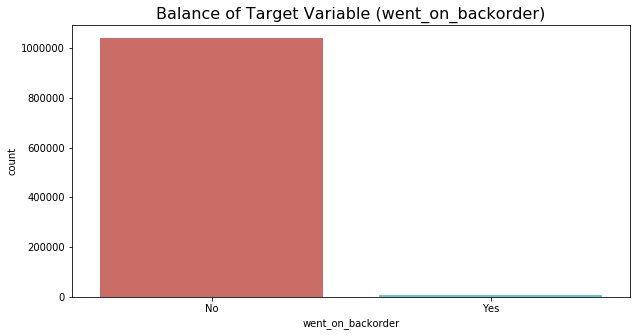

In [24]:
# Defining the figure of the plot and axes
fig, ax = plt.subplots(figsize=(10,5))

# Defining plot parameters
ax.set_title('Balance of Target Variable (went_on_backorder)', fontsize=16)

# Ploting
sns.countplot(raw_csv_data['went_on_backorder'],palette='hls')

# Saving the plot
plt.savefig(path_figures + 'backorder_balance_binary.png', bbox_inches='tight')

plt.show()

- Splitting original dataset to have a **test data** for all experiments for addressing the imbalanced data (10% of the original dataset).

In [25]:
raw_csv_data_test_for_all = raw_csv_data.sample(frac=0.1, random_state=123)

- Removing the **test data** from **original** dataset.

In [26]:
raw_csv_data_90_towork = raw_csv_data.loc[~raw_csv_data.index.isin(raw_csv_data_test_for_all.index), :]

- Checking the balance and size of new test dataset (10% of the **original** dataset).

In [27]:
raw_csv_data_test_for_all.groupby(['went_on_backorder'])['went_on_backorder'].count().sort_values(ascending=False)

went_on_backorder
No     103959
Yes       899
Name: went_on_backorder, dtype: int64

- Checking the balance and size of the **original** dataset without test data (10% of the original dataset).

In [28]:
raw_csv_data_90_towork.groupby(['went_on_backorder'])['went_on_backorder'].count().sort_values(ascending=False)

went_on_backorder
No     935716
Yes      8001
Name: went_on_backorder, dtype: int64

- Applying down sample and up sample approach to balance the **original** dataset.

In [29]:
from sklearn.utils import resample

- Dividing **original** dataset between each value of targets ("Yes" and "No").

In [30]:
raw_csv_data_no = raw_csv_data_90_towork[raw_csv_data.went_on_backorder == 'No']
raw_csv_data_yes = raw_csv_data_90_towork[raw_csv_data.went_on_backorder == 'Yes']

C:\Users\Bruno\Anaconda3\envs\py3-TF2.0\lib\site-packages\ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.
C:\Users\Bruno\Anaconda3\envs\py3-TF2.0\lib\site-packages\ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


- Downsampling the **original** dataset with negative answers ("No").

In [31]:
# Downsampling "majority" class "No" without changing original values
# This is for the experiment with a balanced data 50% yes 50% no
# This dataset will be used together with the original dataset of positive answers ("Yes")

raw_csv_data_no_down = resample(raw_csv_data_no,
                      replace=False,
                      n_samples=8000,
                      random_state=123)


# Downsampling "majority" class "No" without changing original values
# This is for the experiment with a imbalanced data 5% yes 95% no
# This dataset will be used together with the original dataset of positive answers ("Yes")

raw_csv_data_no_down_3 = resample(raw_csv_data_no,
                      replace=False,
                      n_samples=152019,
                      random_state=123)



# Downsampling "majority" class "No" without changing original values
# This dataset will be used together with the up-sampled dataset of positive answers ("Yes")

raw_csv_data_no_down_2 = resample(raw_csv_data_no,
                      replace=False,
                      n_samples=40000,
                      random_state=123)

- Upsampling the dataset with positive answers ("Yes).

In [32]:
# Upsampling "minority" class replacing additional data with random data based on original data

raw_csv_data_yes_up = resample(raw_csv_data_yes,
                      replace=True,
                      n_samples=40000,
                      random_state=123)

- Combining the **down-sampled** and the **up-sampled** datasets.

In [33]:
# Down-sampled 50/50
raw_csv_data_downsampled_5050 = pd.concat([raw_csv_data_yes,raw_csv_data_no_down])

# Down-sampled 05/95
raw_csv_data_downsampled_0595 = pd.concat([raw_csv_data_yes,raw_csv_data_no_down_3])

# Up-sampled
raw_csv_data_upsampled = pd.concat([raw_csv_data_yes_up,raw_csv_data_no_down_2])

- **Down-sampled** dataset with **50% of positive** and **50% of negative** classes rebalanced.

In [34]:
raw_csv_data_downsampled_5050.groupby(['went_on_backorder'])['went_on_backorder'].count().sort_values(ascending=False)

went_on_backorder
Yes    8001
No     8000
Name: went_on_backorder, dtype: int64

- Ploting the **down-sampled** dataset with **50% of positive** and **50% of negative** classes rebalanced.

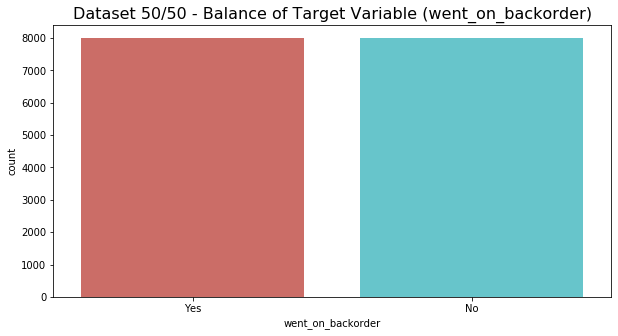

In [35]:
# Defining the figure of the plot and axes
fig, ax = plt.subplots(figsize=(10,5))

# Defining plot parameters
ax.set_title('Dataset 50/50 - Balance of Target Variable (went_on_backorder)', fontsize=16)

# Ploting
sns.countplot(raw_csv_data_downsampled_5050['went_on_backorder'],palette='hls')

# Saving the plot
plt.savefig(path_figures + 'backorder_rebalanced_ds_5050.png', bbox_inches='tight')

plt.show()

- **Down-sampled** dataset with **5% of positive** and **95% of negative** classes rebalanced.

In [36]:
raw_csv_data_downsampled_0595.groupby(['went_on_backorder'])['went_on_backorder'].count().sort_values(ascending=False)

went_on_backorder
No     152019
Yes      8001
Name: went_on_backorder, dtype: int64

- Ploting the **down-sampled** dataset with **5% of positive** and **95% of negative** classes rebalanced.

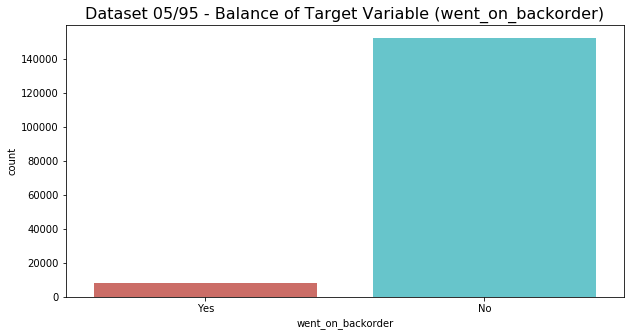

In [37]:
# Defining the figure of the plot and axes
fig, ax = plt.subplots(figsize=(10,5))

# Defining plot parameters
ax.set_title('Dataset 05/95 - Balance of Target Variable (went_on_backorder)', fontsize=16)

# Ploting
sns.countplot(raw_csv_data_downsampled_0595['went_on_backorder'],palette='hls')

# Saving the plot
plt.savefig(path_figures + 'backorder_rebalanced_ds_0595.png', bbox_inches='tight')

plt.show()

- **Up-sampled** dataset rebalanced.

In [38]:
raw_csv_data_upsampled.groupby(['went_on_backorder'])['went_on_backorder'].count().sort_values(ascending=False)

went_on_backorder
Yes    40000
No     40000
Name: went_on_backorder, dtype: int64

- Ploting the **up-sampled** dataset rebalanced.

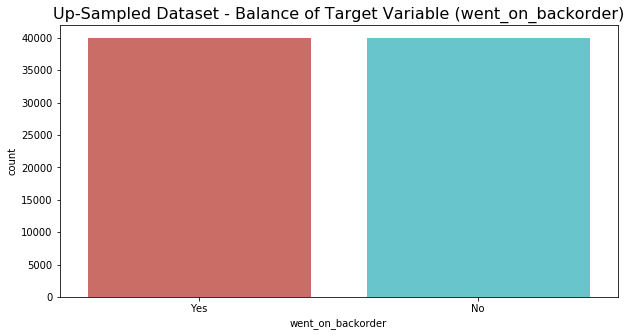

In [39]:
# Defining the figure of the plot and axes
fig, ax = plt.subplots(figsize=(10,5))

# Defining plot parameters
ax.set_title('Up-Sampled Dataset - Balance of Target Variable (went_on_backorder)', fontsize=16)

# Ploting
sns.countplot(raw_csv_data_upsampled['went_on_backorder'],palette='hls')

# Saving the plot
plt.savefig(path_figures + 'backorder_rebalanced_up.png', bbox_inches='tight')

plt.show()

# 7. Shuffling 

As we are dealing with a linear model by nature, it is a good practice to shuffle the data so the model will not get used to the data.

- Shuffling **down-sampled 50/50** dataset. up-sampled and down-sampled datasets and test_for_all

In [40]:
# Creating shuffled indices from down-sampled dataset
shuffled_indices = np.arange(raw_csv_data_downsampled_5050.shape[0])

# Shuffling down-sampled indices
shuffled_indices
np.random.shuffle(shuffled_indices)

# Creating new down-sampled dataset based on shuffled indices
shuffled_downsampled_5050 = raw_csv_data_downsampled_5050.iloc[shuffled_indices]

- Shuffling **down-sampled 05/95** dataset.

In [41]:
# Creating shuffled indices from down-sampled dataset
shuffled_indices = np.arange(raw_csv_data_downsampled_0595.shape[0])

# Shuffling down-sampled indices
shuffled_indices
np.random.shuffle(shuffled_indices)

# Creating new down-sampled dataset based on shuffled indices
shuffled_downsampled_0595 = raw_csv_data_downsampled_0595.iloc[shuffled_indices]

- Shuffling **up-sampled** dataset.

In [42]:
# Creating shuffled indices from up-sampled dataset
shuffled_indices = np.arange(raw_csv_data_upsampled.shape[0])

# Shuffling up-sampled indices
shuffled_indices
np.random.shuffle(shuffled_indices)

# Creating new up-sampled dataset based on shuffled indices
shuffled_upsampled = raw_csv_data_upsampled.iloc[shuffled_indices]

- Shuffling **test_for_all** dataset.

In [43]:
# Creating shuffled indices from test_for_all dataset
shuffled_indices = np.arange(raw_csv_data_test_for_all.shape[0])

# Shuffling test_for_all indices
shuffled_indices
np.random.shuffle(shuffled_indices)

# Creating new test_for_all dataset based on shuffled indices
shuffled_test_for_all = raw_csv_data_test_for_all.iloc[shuffled_indices]

Dividing **features** and **targets** in the shuffled datasets.

- Dividing **features** and **targets** from shuffled **down-sampled 50/50** dataset.

In [44]:
unscaled_inputs_all_ds_5050 = shuffled_downsampled_5050.iloc[:,1:-1]

In [45]:
targets_all_ds_5050 = shuffled_downsampled_5050.iloc[:,-1]

- Dividing **features** and **targets** from shuffled **down-sampled 05/95** dataset.

In [46]:
unscaled_inputs_all_ds_0595 = shuffled_downsampled_0595.iloc[:,1:-1]

In [47]:
targets_all_ds_0595 = shuffled_downsampled_0595.iloc[:,-1]

- Dividing **features** and **targets** from shuffled **up-sampled** dataset.

In [48]:
unscaled_inputs_all_us = shuffled_upsampled.iloc[:,1:-1]

In [49]:
targets_all_us = shuffled_upsampled.iloc[:,-1]

- Dividing **features** and **targets** from shuffled **test_for_all** dataset.

In [50]:
unscaled_inputs_all_tfa = shuffled_test_for_all.iloc[:,1:-1]

In [51]:
targets_all_tfa = shuffled_test_for_all.iloc[:,-1]

# 8. One-Hot Enconding

One-Hot Enconding uses "binarization" to convert a categorical variable into a computer-based feature to be used by the model.

- Encoding categorical variables **"potential_issue"**, **"deck_risk"**, **"oe_constraint"**, **"ppap_risk"**, **"stop_auto_buy"**, **"rev_stop"** of the **down-sampled 50/50** dataset using **get_dummies** method.

In [52]:
unscaled_inputs_all_ds_5050 = pd.get_dummies(unscaled_inputs_all_ds_5050)

In [53]:
unscaled_inputs_all_ds_5050 = unscaled_inputs_all_ds_5050.astype(float)

- Encoding categorical variables **"potential_issue"**, **"deck_risk"**, **"oe_constraint"**, **"ppap_risk"**, **"stop_auto_buy"**, **"rev_stop"** of the **down-sampled 05/95** dataset using **get_dummies** method.

In [54]:
unscaled_inputs_all_ds_0595 = pd.get_dummies(unscaled_inputs_all_ds_0595)

In [55]:
unscaled_inputs_all_ds_0595 = unscaled_inputs_all_ds_0595.astype(float)

- Encoding **target** variable of both **down-sampled** datasets  (50/50 and 05/95).

In [56]:
target_map = {'Yes': 1.0, 'No': 0.0}

In [57]:
targets_all_ds_5050 = targets_all_ds_5050.replace(target_map)

In [58]:
targets_all_ds_0595 = targets_all_ds_0595.replace(target_map)

- Encoding categorical variables "potential_issue", "deck_risk", "oe_constraint", "ppap_risk", "stop_auto_buy", "rev_stop" of the **up-sampled** dataset using **get_dummies** function.

In [59]:
unscaled_inputs_all_us = pd.get_dummies(unscaled_inputs_all_us)

In [60]:
unscaled_inputs_all_us = unscaled_inputs_all_us.astype(float)

- Encoding target variable of **up-sampled** dataset.

In [61]:
target_map = {'Yes': 1.0, 'No': 0.0}

In [62]:
targets_all_us = targets_all_us.replace(target_map)

- Encoding categorical variables **"potential_issue"**, **"deck_risk"**, **"oe_constraint"**, **"ppap_risk"**, **"stop_auto_buy"**, **"rev_stop"** of the **test_for_all** dataset using **get_dummies** method.

In [63]:
unscaled_inputs_all_tfa = pd.get_dummies(unscaled_inputs_all_tfa)

In [64]:
unscaled_inputs_all_tfa = unscaled_inputs_all_tfa.astype(float)

- Encoding **target** variable of **test_for_all** dataset.

In [65]:
target_map = {'Yes': 1.0, 'No': 0.0}

In [66]:
targets_all_tfa = targets_all_tfa.replace(target_map)

# 9. Feature Scaling

Feature scaling put the numerical variables onto similar numerical scales so one feature will not have higher preference over another.

- Importing library to scale inputs.

In [67]:
from sklearn import preprocessing

- Scalling **down-sampled 50/50** dataset.

In [68]:
scaled_inputs_ds_5050 = preprocessing.scale(unscaled_inputs_all_ds_5050)

- Scalling **down-sampled 05/95** dataset.

In [69]:
scaled_inputs_ds_0595 = preprocessing.scale(unscaled_inputs_all_ds_0595)

- Scalling **up-sampled** dataset.

In [70]:
scaled_inputs_us = preprocessing.scale(unscaled_inputs_all_us)

- Scalling **test_for_all** dataset.

In [71]:
scaled_inputs_tfa = preprocessing.scale(unscaled_inputs_all_tfa)

## 10. Spliting

- Spliting features of **down-sampled 50/50** dataset into **train** (80%), **validation** (10%) and **test** (10%) datasets.

In [72]:
train_inputs_ds_5050, validation_inputs_ds_5050, test_inputs_ds_5050 = np.split(scaled_inputs_ds_5050, 
                                                                 [int(.8 * len(scaled_inputs_ds_5050)), 
                                                                  int(.9 * len(scaled_inputs_ds_5050))])

- Spliting targets of **down-sampled** dataset into **train** (80%), **validation** (10%) and **test** (10%) datasets.

In [73]:
train_targets_ds_5050, validation_targets_ds_5050, test_targets_ds_5050 = np.split(targets_all_ds_5050, 
                                                                 [int(.8 * len(targets_all_ds_5050)), 
                                                                  int(.9 * len(targets_all_ds_5050))])

# Converting targets into numpy array. 
# For some reason when we use the scale method of sklearn kit it changes the object from pandas dataframe to a numpy array.
# Converting the targets that do not need to scale into a numpy array for compatibility reasons.

train_targets_ds_5050 = np.array(train_targets_ds_5050)
validation_targets_ds_5050 = np.array(validation_targets_ds_5050)
test_targets_ds_5050 = np.array(test_targets_ds_5050)

- Spliting features of **down-sampled 05/95** dataset into **train** (80%), **validation** (10%) and **test** (10%) datasets.

In [74]:
train_inputs_ds_0595, validation_inputs_ds_0595, test_inputs_ds_0595 = np.split(scaled_inputs_ds_0595, 
                                                                 [int(.8 * len(scaled_inputs_ds_0595)), 
                                                                  int(.9 * len(scaled_inputs_ds_0595))])

- Spliting targets of **down-sampled 05/95** dataset into **train** (80%), **validation** (10%) and **test** (10%) datasets.

In [75]:
train_targets_ds_0595, validation_targets_ds_0595, test_targets_ds_0595 = np.split(targets_all_ds_0595, 
                                                                 [int(.8 * len(targets_all_ds_0595)), 
                                                                  int(.9 * len(targets_all_ds_0595))])

# Converting targets into numpy array. 
# For some reason when we use the scale method of sklearn kit it changes the object from pandas dataframe to a numpy array.
# Converting the targets that do not need to scale into a numpy array for compatibility reasons.

train_targets_ds_0595 = np.array(train_targets_ds_0595)
validation_targets_ds_0595 = np.array(validation_targets_ds_0595)
test_targets_ds_0595 = np.array(test_targets_ds_0595)

- Spliting features of **up-sampled** dataset into **train** (80%), **validation** (10%) and **test** (10%) datasets.

In [76]:
train_inputs_us, validation_inputs_us, test_inputs_us = np.split(scaled_inputs_us, 
                                                                 [int(.8 * len(scaled_inputs_us)), 
                                                                  int(.9 * len(scaled_inputs_us))])



- Spliting targets of **up-sampled** dataset into **train** (80%), **validation** (10%) and **test** (10%) datasets.

In [77]:
train_targets_us, validation_targets_us, test_targets_us = np.split(targets_all_us, 
                                                                 [int(.8 * len(targets_all_us)), 
                                                                  int(.9 * len(targets_all_us))])

# Converting targets into numpy array. 
# For some reason when we use the scale method of sklearn kit it changes the object from pandas dataframe to a numpy array.
# Converting the targets that do not need to scale into a numpy array for compatibility reasons.

train_targets_us = np.array(train_targets_us)
validation_targets_us = np.array(validation_targets_us)
test_targets_us = np.array(test_targets_us)

- converting targets into numpy arrays for the **test_for_all dataset**

In [78]:
# Converting targets into numpy array. 
# For some reason when we use the scale method of sklearn kit it changes the object from pandas dataframe to a numpy array.
# Converting the targets that do not need to scale into a numpy array for compatibility reasons.

targets_all_tfa = np.array(targets_all_tfa)

## 11. Exporting

 Saving the resulting datasets in numpy format (npz) which will be used by tensorflow model.

- Saving **down-sampled 50/50** dataset.

In [79]:
# Save the three datasets in *.npz.

np.savez(path_result + 'DS_5050_backorder_data_train', inputs=train_inputs_ds_5050, targets=train_targets_ds_5050)
np.savez(path_result + 'DS_5050_backorder_data_validation', inputs=validation_inputs_ds_5050, targets=validation_targets_ds_5050)
np.savez(path_result + 'DS_5050_backorder_data_test', inputs=test_inputs_ds_5050, targets=test_targets_ds_5050)

- Saving **down-sampled 05/95** dataset.

In [80]:
# Save the three datasets in *.npz.

np.savez(path_result + 'DS_0595_backorder_data_train', inputs=train_inputs_ds_0595, targets=train_targets_ds_0595)
np.savez(path_result + 'DS_0595_backorder_data_validation', inputs=validation_inputs_ds_0595, targets=validation_targets_ds_0595)
np.savez(path_result + 'DS_0595_backorder_data_test', inputs=test_inputs_ds_0595, targets=test_targets_ds_0595)

- Saving **up-sampled 50/50** dataset.

In [81]:
np.savez(path_result + 'US_backorder_data_train', inputs=train_inputs_us, targets=train_targets_us)
np.savez(path_result + 'US_backorder_data_validation', inputs=validation_inputs_us, targets=validation_targets_us)
np.savez(path_result + 'US_backorder_data_test', inputs=test_inputs_us, targets=test_targets_us)

- Saving **test_for_all** dataset.

In [82]:
np.savez(path_result + 'TFA_backorder_data_gral_test', inputs=scaled_inputs_tfa, targets=targets_all_tfa)